# Competition Description

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.
Practice Skills

    * Computer vision fundamentals including simple neural networks

    * Classification methods such as SVM and K-nearest neighbors

# Acknowledgements 

More details about the dataset, including algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html. The dataset is made available under a Creative Commons Attribution-Share Alike 3.0 license.

[Kaggle Link](https://www.kaggle.com/c/digit-recognizer)

# Notebook Description

This notebook contains different Deep Learning approaches for classifying MNIST database. The notebook is arranged as follows:
- [Data Analysis](#data-analysis)

In [1]:
# Import Modules
import numpy as np
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
#import models

import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint 

from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

Using TensorFlow backend.


## Data Analysis
The first part of any DL/ML approach is understanding the data. So here we will analyze the MNIST dataset using Pandas

In [2]:
# Read the data and create train, validation and test dataset
data = pd.read_csv('train.csv')
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
val = data[~msk]
test = pd.read_csv('test.csv')

In [3]:
print(data.shape)

(42000, 785)


In [4]:
def create_data(df):
    labels = df.loc[:]['label']
    y_one_hot = pd.get_dummies(labels).astype(np.uint8)
    y = y_one_hot.values # One Hot encode the labels
    x = df.iloc[:,1:].values
    x = x.astype(np.float)
    # Normalize data
    x = np.multiply(x, 1.0 / 255.0)
    return x,y

In [5]:
X_train, Y_train = create_data(train)
X_val, Y_val = create_data(val)
X_test = (test.iloc[:,:].values).astype(np.float)
X_test = np.multiply(X_test, 1.0 / 255.0)


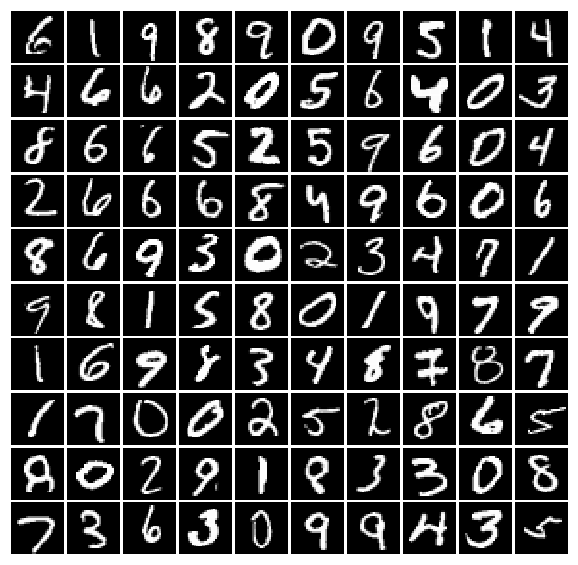

In [6]:
# Plot images 
import matplotlib.gridspec as gridspec
def plot(samples):
    fig = plt.figure(figsize=(10, 10))
    gs = gridspec.GridSpec(10, 10)
    gs.update(wspace=0.05, hspace=0.05)
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='gray')
    return 

import random
idx = np.random.randint(0, len(X_train)-1, 100)
samples = X_train[idx]

plot(samples)

## Multilayered Perceptrons as Classifiers
MLP is a fully connected feed-forward neural network. We will use tensorflow to build the network.

In [7]:
batch_size = 200
epochs = 500
optimizer = SGD()
input_shape = (784,)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
filepath = 'mlp.h5'

In [8]:
model = Sequential()
model.add(Dense(260, activation='relu', input_shape=input_shape))
#model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)
# I replaced the predefined method of saving the last state with saving the best state
checkpointer = ModelCheckpoint(filepath=filepath, 
                               verbose=1, save_best_only=True)
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
validation_data=(X_val, Y_val), callbacks=[checkpointer])


out_train = model.evaluate(X_train, Y_train)
out_val = model.evaluate(X_val, Y_val)
out_test = model.predict(X_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 260)               204100    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2610      
Total params: 206,710
Trainable params: 206,710
Non-trainable params: 0
_________________________________________________________________
Train on 33547 samples, validate on 8453 samples
Epoch 1/500
33547/33547 [==============================] - 4s - loss: 1.6622 - acc: 0.5963 - val_loss: 1.1706 - val_acc: 0.7768
Epoch 2/500
33547/33547 [==============================] - 2s - loss: 0.9379 - acc: 0.8146 - val_loss: 0.7673 - val_acc: 0.8366
Epoch 3/500
33547/33547 [==============================] - 2s - loss: 0.6823 - acc: 0.8479 - val_loss: 0.6104 - val_acc: 0.8559
Epoch 4/500
33547/33547 [==============================] - 2s - loss: 0.5687 - acc: 0.8642 - val_lo

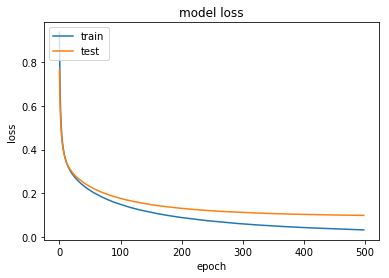

In [9]:
# history for loss after 1st epoch
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
out1 = out_test.argmax(axis=1)
submissions = pd.DataFrame({"ImageId": list(range(1,len(out1)+1)),
    "Label": out1})
submissions.to_csv("submission_mpl4.csv", index=False, header=True)

In [10]:
print(out_val, out_train)

[0.097898077444760312, 0.96983319531527268] [0.031017669964262386, 0.99442573106388055]


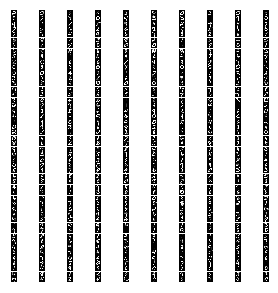

In [32]:
idx = [4,16,23,28,29,60,95, 102, 110, 119, 141, 169, 215, 224, 226 , 244, 260, 263, 269, 276, 284, 288, 342,350, 365, 373]

#idx = idx - np.ones(len(idx))
import matplotlib.gridspec as gridspec
def plot(samples):
    fig = plt.figure(figsize=(5, 5))
    gs = gridspec.GridSpec(50, 10)
    gs.update(wspace=0.05, hspace=0.05)
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='gray')
    return 
samples = X_test[0:100]
plot(samples)

In [27]:
len(X_test)*0.25

7000.0

In [7]:
def load_data():
    # Read the data and create train, validation and test dataset
    data = pd.read_csv('train.csv')
    msk = np.random.rand(len(data)) < 0.8
    train = data[msk]
    val = data[~msk]
    test = pd.read_csv('test.csv')
    
def create_data(df):
    labels = df.loc[:]['label']
    y_one_hot = pd.get_dummies(labels).astype(np.uint8)
    y = y_one_hot.values # One Hot encode the labels
    x = df.iloc[:,1:].values
    x = x.astype(np.float)
    # Normalize data
    x = np.multiply(x, 1.0 / 255.0)
    x = x.reshape(-1, 28, 28, 1) # return each images as 96 x 96 x 1
    return x,y

load_data()
X_train, Y_train = create_data(train)
X_val, Y_val = create_data(val)
X_test = (test.iloc[:,:].values).astype(np.float)
X_test = np.multiply(X_test, 1.0 / 255.0)
X_test = X_test.reshape(-1, 28, 28, 1) # return each images as 96 x 96 x 1
    

In [81]:
batch_size = 100
epochs = 50
optimizer = SGD()
input_shape = (28, 28, 1)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
filepath = 'cnn.h5'


In [82]:
## CNN in Keras
model = Sequential()

model.add(Convolution2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=4))
#model.add(Dropout(0.4))
model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Convolution2D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Convolution2D(filters=256, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.6))
#model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))


# Summarize the model
model.summary()

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])
# I replaced the predefined method of saving the last state with saving the best state
checkpointer = ModelCheckpoint(filepath='cnn.h5', 
                               verbose=1, save_best_only=True)


history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
validation_data=(X_val, Y_val), callbacks=[checkpointer])


out_train = model.evaluate(X_train, Y_train)
out_val = model.evaluate(X_val, Y_val)
out_test = model.predict(X_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        32832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)       131200    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 128)         0         
__________

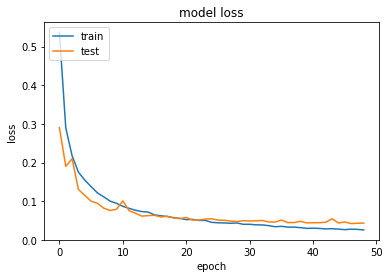

In [83]:
# history for loss after 1st epoch
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
out1 = out_test.argmax(axis=1)
submissions = pd.DataFrame({"ImageId": list(range(1,len(out1)+1)),
    "Label": out1})
submissions.to_csv("submission_cnn.csv", index=False, header=True)

In [84]:
print(out_val, out_train)

[0.043582537613759971, 0.98769667573642494] [0.011797835910335033, 0.99678063612245504]


### Data Augmentation 


In [8]:
batch_size = 100
epochs = 50
optimizer = Adam()
input_shape = (28, 28, 1)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
filepath = 'cnn_augment.hdf5'

In [9]:
#CNN with Data Augmentation

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    horizontal_flip=False, #flip images horizontally
    shear_range=0.3,   # Add shear randomly counter clockwise
    zoom_range=0.3 ) # randomly zooming the image

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    horizontal_flip=False, #flip images horizontally
    shear_range=0.3,   # Add shear randomly counter clockwise
    zoom_range=0.3 ) # randomly zooming the image

# fit augmented image generator on data
datagen_train.fit(X_train)
datagen_valid.fit(X_val)

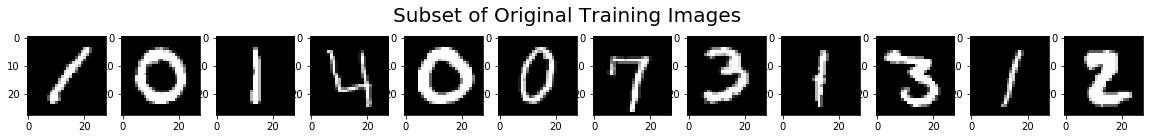

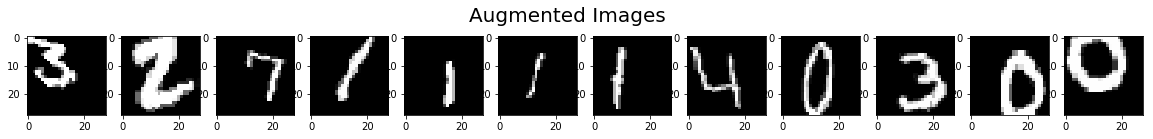

In [10]:
# Visualize Augmented data
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = X_train[:12]


# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i].reshape(28,28), cmap='gray')
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i].reshape(28,28), cmap = 'gray')
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=4))
#model.add(Dropout(0.4))
model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Convolution2D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Convolution2D(filters=256, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.4))
model.add(Convolution2D(filters=256, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.6))
#model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
__________

In [12]:
# compile the model
model.compile(loss=loss, optimizer=optimizer, 
                  metrics=metrics)

In [21]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath=filepath, verbose=1, 
                               save_best_only=True)
history = model.fit_generator(datagen_train.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(X_val, Y_val, batch_size=batch_size),
                    validation_steps=X_val.shape[0] // batch_size)

Epoch 1/50
Epoch 00000: val_loss improved from inf to 0.03161, saving model to cnn_augment.hdf5
11s - loss: 0.0364 - acc: 0.9892 - val_loss: 0.0316 - val_acc: 0.9910
Epoch 2/50
Epoch 00001: val_loss did not improve
11s - loss: 0.0334 - acc: 0.9899 - val_loss: 0.0376 - val_acc: 0.9893
Epoch 3/50
Epoch 00002: val_loss did not improve
11s - loss: 0.0350 - acc: 0.9891 - val_loss: 0.0319 - val_acc: 0.9907
Epoch 4/50
Epoch 00003: val_loss did not improve
11s - loss: 0.0322 - acc: 0.9899 - val_loss: 0.0318 - val_acc: 0.9911
Epoch 5/50
Epoch 00004: val_loss did not improve
11s - loss: 0.0318 - acc: 0.9904 - val_loss: 0.0330 - val_acc: 0.9885
Epoch 6/50
Epoch 00005: val_loss did not improve
11s - loss: 0.0331 - acc: 0.9898 - val_loss: 0.0361 - val_acc: 0.9895
Epoch 7/50
Epoch 00006: val_loss did not improve
11s - loss: 0.0326 - acc: 0.9897 - val_loss: 0.0384 - val_acc: 0.9900
Epoch 8/50
Epoch 00007: val_loss did not improve
11s - loss: 0.0301 - acc: 0.9909 - val_loss: 0.0325 - val_acc: 0.9902
E

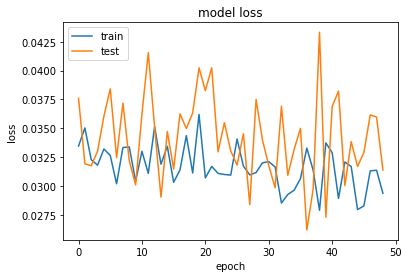

In [22]:
# history for loss after 1st epoch
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
out_train = model.evaluate(X_train, Y_train)
out_val = model.evaluate(X_val, Y_val)
out_test = model.predict(X_test)
print()
print(out_val, out_train)

8128/8291 [============================>.] - ETA: 0s0s 

In [20]:
out1 = out_test.argmax(axis=1)
submissions = pd.DataFrame({"ImageId": list(range(1,len(out1)+1)),
    "Label": out1})
submissions.to_csv("submission_cnn_augment.csv", index=False, header=True)

In [ ]:
# Now trying transfer learning
#from keras.applications.inception_v3 import InceptionV3
#from keras.layers import Input
#input_tensor = Input(shape=(28, 28, 1)) 
#model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)